In [ ]:
# Discretised data is taken into dataframe and sparse reward function added based on alive and died in hospital
# Values of each state variable were capped based on the distribution of the data
# The 28 state variables were then split into binary, normal and logarithmic fields
# Scale the dataset
# Split data according to age

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame

In [4]:
#Upload the csv
disc_inp_data = pd.read_csv("C:\\Users\\sara1\\Desktop\\Workingdata\\discretised_input_data.csv", low_memory=False)

In [5]:
#Display the columns
disc_inp_data.head()

,stay_id,sofa_score,sirs,age,weight,gender,gcs,sofa_24hours,bilirubin_total,bicarbonate,...,albumin,creatinine,heart_rate,temperature,spo2,vaso_rate,vaso_amount,urineoutput,died_in_hosp,vaso_input
0,34712382,7,3,91,51.0,0,14,7,2.879823,36.0,...,2.895128,2.4,60.0,36.980675,96.0,2.400000,14.799999,0.0,0,2.0
1,34712382,7,3,91,51.0,0,14,7,2.879823,36.0,...,2.895128,2.4,60.0,36.980675,96.0,2.400000,14.799999,0.0,0,2.0
2,34712382,7,3,91,51.0,0,14,7,2.879823,36.0,...,2.895128,2.4,60.0,36.980675,96.0,2.400000,14.799999,0.0,1,2.0
3,34712382,7,3,91,51.0,0,14,7,2.879823,36.0,...,2.895128,2.4,60.0,36.980675,96.0,2.400000,14.799999,0.0,1,2.0
4,30902754,2,4,87,80.0,1,8,1,2.879823,36.0,...,2.895128,0.5,120.0,36.980675,97.0,2.406079,39.058680,30.0,1,4.0


In [16]:
disc_inp_data.shape[0]

6038365

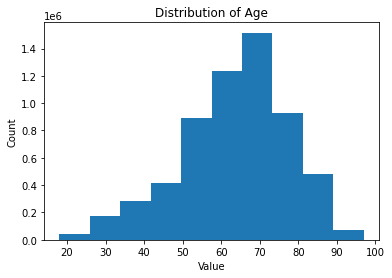

In [6]:
#Plot distribution of age in the dataset
column_values = disc_inp_data['age']
plt.hist(column_values, bins=10)
plt.title('Distribution of Age')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

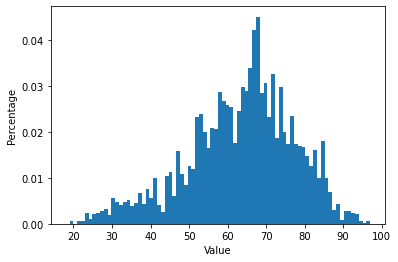

In [7]:
#Plot distribution of age in the dataset as percentage of total values
plt.hist(disc_inp_data['age'], density=True, bins=len(set(disc_inp_data['age'])))
plt.ylabel('Percentage')
plt.xlabel('Value')
plt.show()

In [8]:
#Find 50th percentile age to split datasets equally
median = disc_inp_data['age'].quantile(0.5)
print(median)

65.0


In [9]:
# add rewards - sparsely for now; reward function shaping comes in a separate script
disc_inp_data['reward'] = 0
for i in disc_inp_data.index:
    if i == 0:
        continue
    else:
        if disc_inp_data.loc[i, 'stay_id'] != disc_inp_data.loc[i-1, 'stay_id']:
            if disc_inp_data.loc[i-1, 'died_in_hosp'] == 1:
                disc_inp_data.loc[i-1,'reward'] = -100
            elif disc_inp_data.loc[i-1, 'died_in_hosp'] == 0:
                disc_inp_data.loc[i-1,'reward'] = 100
            else:
                print ("error in row"), i-1
if disc_inp_data.loc[len(disc_inp_data)-1, 'died_in_hosp'] == 1:
    disc_inp_data.loc[len(disc_inp_data)-1, 'reward'] = -100
elif disc_inp_data.loc[len(disc_inp_data)-1, 'died_in_hosp'] == 0:
     disc_inp_data.loc[len(disc_inp_data)-1, 'reward'] = 100
print (disc_inp_data['reward'].value_counts())

 0      6035066
-100       1900
 100       1399
Name: reward, dtype: int64


In [10]:
# cap values in train and test
caps = pd.read_csv("C:\\Users\\sara1\\Desktop\\Workingdata\\capping_values.csv")
for i in caps.index:
    param = caps.loc[i,'Parameter']
    maxval = caps.loc[i,'limsup']
    minval = caps.loc[i,'liminf']
    disc_inp_data[param][disc_inp_data[param] >= maxval] = maxval
    disc_inp_data[param][disc_inp_data[param] <= minval] = minval

C:\Users\sara1\AppData\Local\Temp/ipykernel_18696/3616080851.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disc_inp_data[param][disc_inp_data[param] >= maxval] = maxval
C:\Users\sara1\AppData\Local\Temp/ipykernel_18696/3616080851.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disc_inp_data[param][disc_inp_data[param] <= minval] = minval


In [11]:
binary_fields = ['gender']
norm_fields= ['sofa_score', 'sirs', 'age', 'weight', 'gcs', 'sofa_24hours',
              'hemoglobin', 'chloride', 'calcium', 'potassium', 'sodium',
              'lactate', 'glucose', 'respiratory_rate_total', 'fio2',
              'platelet', 'wbc', 'albumin', 'heart_rate', 'temperature',
              'bicarbonate']
log_fields = ['bilirubin_total', 'creatinine', 'spo2', 'vaso_rate',
              'vaso_amount', 'urineoutput']

In [12]:
# normalise binary fields
disc_inp_data[binary_fields] = disc_inp_data[binary_fields] - 0.5

In [13]:
#Split the dataset based on age
split_column = "age"

# Determine the range of values you want to split on
age_value = 65

# Filter the dataset to create the subsets based on the range of values in the column
df_below_65 = disc_inp_data[disc_inp_data[split_column] <= age_value]
df_above_65 = disc_inp_data[disc_inp_data[split_column] > age_value]

In [14]:
df_below_65.shape[0]

3039390

In [15]:
df_above_65.shape[0]

2998975

In [17]:
# normal distn fields
for item in norm_fields:
    av = disc_inp_data[item].mean()
    std = disc_inp_data[item].std()
    df_below_65[item] = (df_below_65[item] - av) / std
    df_above_65[item] = (df_above_65[item] - av) / std

C:\Users\sara1\AppData\Local\Temp/ipykernel_18696/498807001.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_below_65[item] = (df_below_65[item] - av) / std
C:\Users\sara1\AppData\Local\Temp/ipykernel_18696/498807001.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_above_65[item] = (df_above_65[item] - av) / std


In [18]:
# log normal fields
disc_inp_data[log_fields] = np.log(0.1 + disc_inp_data[log_fields])
for item in log_fields:
    av = disc_inp_data[item].mean()
    std = disc_inp_data[item].std()
    df_below_65[item] = (df_below_65[item] - av) / std
    df_above_65[item] = (df_above_65[item] - av) / std

C:\Users\sara1\AppData\Local\Temp/ipykernel_18696/1521145171.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_below_65[item] = (df_below_65[item] - av) / std
C:\Users\sara1\AppData\Local\Temp/ipykernel_18696/1521145171.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_above_65[item] = (df_above_65[item] - av) / std


In [19]:
df_below_65.head()

,stay_id,sofa_score,sirs,age,weight,gender,gcs,sofa_24hours,bilirubin_total,bicarbonate,...,creatinine,heart_rate,temperature,spo2,vaso_rate,vaso_amount,urineoutput,died_in_hosp,vaso_input,reward
9187,38563000,-1.060616,1.206321,-1.818979,-0.244955,0.5,1.029593,-1.542252,8.853503,NaN,...,7.378096,0.562192,-1.510722e-09,750.006522,0.802604,1.591698,19.151084,0,2.0,0
9188,38563000,-1.060616,1.206321,-1.818979,-0.244955,0.5,1.029593,-1.329592,8.853503,NaN,...,7.378096,0.562192,-1.510722e-09,750.006522,0.802604,1.591698,19.151084,0,2.0,0
9189,38563000,-1.060616,1.206321,-1.818979,-0.244955,0.5,1.029593,-0.904270,8.853503,NaN,...,7.378096,0.562192,-1.510722e-09,750.006522,0.802604,1.591698,19.151084,0,2.0,0
9190,38563000,-1.060616,1.206321,-1.818979,-0.244955,0.5,1.029593,-1.542252,8.853503,NaN,...,7.378096,0.562192,-1.510722e-09,750.006522,0.802604,1.591698,19.151084,0,2.0,0
9191,38563000,-1.060616,1.206321,-1.818979,-0.244955,0.5,1.029593,-1.329592,8.853503,NaN,...,7.378096,0.562192,-1.510722e-09,750.006522,0.802604,1.591698,19.151084,0,2.0,0


In [20]:
df_above_65.head()

,stay_id,sofa_score,sirs,age,weight,gender,gcs,sofa_24hours,bilirubin_total,bicarbonate,...,creatinine,heart_rate,temperature,spo2,vaso_rate,vaso_amount,urineoutput,died_in_hosp,vaso_input,reward
0,34712382,0.408870,-0.067035,1.956760,-1.539522,-0.5,0.764185,-0.266288,8.853503,NaN,...,13.472085,-1.361344,-1.510722e-09,750.006522,3.422667,8.110726,0.470729,0,2.0,0
1,34712382,0.408870,-0.067035,1.956760,-1.539522,-0.5,0.764185,-0.266288,8.853503,NaN,...,13.472085,-1.361344,-1.510722e-09,750.006522,3.422667,8.110726,0.470729,0,2.0,0
2,34712382,0.408870,-0.067035,1.956760,-1.539522,-0.5,0.764185,-0.266288,8.853503,NaN,...,13.472085,-1.361344,-1.510722e-09,750.006522,3.422667,8.110726,0.470729,1,2.0,0
3,34712382,0.408870,-0.067035,1.956760,-1.539522,-0.5,0.764185,-0.266288,8.853503,NaN,...,13.472085,-1.361344,-1.510722e-09,750.006522,3.422667,8.110726,0.470729,1,2.0,-100
4,30902754,-1.060616,1.206321,1.671799,-0.320611,0.5,-0.828263,-1.542252,8.853503,NaN,...,0.134862,0.361225,-1.510722e-09,758.202150,3.435940,23.925028,14.480995,1,4.0,0


In [21]:
# scale features to [0,1] in train set, similar in val and test
import copy
scalable_fields = copy.deepcopy(binary_fields)
scalable_fields.extend(norm_fields)
scalable_fields.extend(log_fields)
for col in scalable_fields:
    minimum = min(df_below_65[col])
    maximum = max(df_below_65[col])
    df_below_65[col] = (df_below_65[col] - minimum)/(maximum-minimum)
    df_above_65[col] = (df_above_65[col] - minimum)/(maximum-minimum)

C:\Users\sara1\AppData\Local\Temp/ipykernel_18696/3152994176.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_below_65[col] = (df_below_65[col] - minimum)/(maximum-minimum)
C:\Users\sara1\AppData\Local\Temp/ipykernel_18696/3152994176.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_above_65[col] = (df_above_65[col] - minimum)/(maximum-minimum)


In [22]:
df_below_65.head()

,stay_id,sofa_score,sirs,age,weight,gender,gcs,sofa_24hours,bilirubin_total,bicarbonate,...,creatinine,heart_rate,temperature,spo2,vaso_rate,vaso_amount,urineoutput,died_in_hosp,vaso_input,reward
9187,38563000,0.0,1.0,0.425532,0.107514,1.0,1.0,0.043478,0.065682,NaN,...,0.105287,0.506438,0.563117,0.959184,0.000483,0.039987,0.057143,0,2.0,0
9188,38563000,0.0,1.0,0.425532,0.107514,1.0,1.0,0.086957,0.065682,NaN,...,0.105287,0.506438,0.563117,0.959184,0.000483,0.039987,0.057143,0,2.0,0
9189,38563000,0.0,1.0,0.425532,0.107514,1.0,1.0,0.173913,0.065682,NaN,...,0.105287,0.506438,0.563117,0.959184,0.000483,0.039987,0.057143,0,2.0,0
9190,38563000,0.0,1.0,0.425532,0.107514,1.0,1.0,0.043478,0.065682,NaN,...,0.105287,0.506438,0.563117,0.959184,0.000483,0.039987,0.057143,0,2.0,0
9191,38563000,0.0,1.0,0.425532,0.107514,1.0,1.0,0.086957,0.065682,NaN,...,0.105287,0.506438,0.563117,0.959184,0.000483,0.039987,0.057143,0,2.0,0


In [25]:
len(df_below_65)

3039390

In [23]:
df_above_65.head()

,stay_id,sofa_score,sirs,age,weight,gender,gcs,sofa_24hours,bilirubin_total,bicarbonate,...,creatinine,heart_rate,temperature,spo2,vaso_rate,vaso_amount,urineoutput,died_in_hosp,vaso_input,reward
0,34712382,0.277778,0.75,1.553191,0.048170,0.0,0.916667,0.304348,0.065682,NaN,...,0.179487,0.218884,0.563117,0.959184,0.000983,0.123571,0.000000,0,2.0,0
1,34712382,0.277778,0.75,1.553191,0.048170,0.0,0.916667,0.304348,0.065682,NaN,...,0.179487,0.218884,0.563117,0.959184,0.000983,0.123571,0.000000,0,2.0,0
2,34712382,0.277778,0.75,1.553191,0.048170,0.0,0.916667,0.304348,0.065682,NaN,...,0.179487,0.218884,0.563117,0.959184,0.000983,0.123571,0.000000,1,2.0,0
3,34712382,0.277778,0.75,1.553191,0.048170,0.0,0.916667,0.304348,0.065682,NaN,...,0.179487,0.218884,0.563117,0.959184,0.000983,0.123571,0.000000,1,2.0,-100
4,30902754,0.000000,1.00,1.468085,0.104046,1.0,0.416667,0.043478,0.065682,NaN,...,0.017094,0.476395,0.563117,0.969388,0.000986,0.326336,0.042857,1,4.0,0


In [26]:
len(df_above_65)

2998975

In [24]:
df_below_65.to_csv('C:\\Users\\sara1\\Desktop\\Workingdata\\rl_below65_scaled.csv',index = False)
df_above_65.to_csv('C:\\Users\\sara1\\Desktop\\Workingdata\\rl_above65_scaled.csv', index = False)